### Importing data

To get started two sets of data will be imported and will be analyzed to figure what will be the best way to preprocess them. After running the code below we can see that both data sets have category data that uses letters and continues data that uses numbers. The training data is comprised of 188,318 rows and 132 columns and the test data is comprised of 125,546 rows and 131 columns. The training data has an extra column for loss. This loss is what the insurance company pays out and is what we want to predict. For the purpose of this project we will be using this data set to train and test the model. The algorithm that found will be used to predict the loss value for the test_data set.


In [2]:
import numpy as np
import pandas as pd
from IPython.display import display


train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

display(train_data.head())
print (train_data.shape)

display(test_data.head())
print( test_data.shape)


,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


(188318, 132)


,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,4,A,B,A,A,A,A,A,A,B,...,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,6,A,B,A,B,A,A,A,A,B,...,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,9,A,B,A,B,B,A,B,A,B,...,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
3,12,A,A,A,A,B,A,A,A,A,...,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
4,15,B,A,A,A,A,B,A,A,A,...,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823


(125546, 131)


In [3]:
train_data.skew()

id       -0.002155
cont1     0.516424
cont2    -0.310941
cont3    -0.010002
cont4     0.416096
cont5     0.681622
cont6     0.461214
cont7     0.826053
cont8     0.676634
cont9     1.072429
cont10    0.355001
cont11    0.280821
cont12    0.291992
cont13    0.380742
cont14    0.248674
loss      3.794958
dtype: float64

### Drop data not needed
After looking at the data there are a few changes that need to be made.
First the column for "id" needs to be dropped because it does not add any value to our model.
Second the "loss" column needs to be separated from the features.


In [4]:
train_columns = train_data.columns.values
train_columns = pd.DataFrame(train_columns)

loss = train_data["loss"]
ids = train_data["id"]

train_data_raw = train_data.drop(["id","loss"], axis = 1)


test_data_id = test_data["id"]
test_data_raw = test_data.drop(["id"], axis = 1)


#make sure only ids and loss columsn were dropped
print (train_data_raw.shape)
print (test_data_raw.shape)






(188318, 130)
(125546, 130)


### Loss data

The loss data is plotted on a histogram chart and we can see that the data is skewed to the right so it needs to be normalized. Regression algorithms can be sensitive to the distribution of values and can results in the model underperforming if the data is not normally distributed.

In [5]:
import matplotlib.pyplot as pl
pl.hist(loss,bins = 100)
pl.show()


<Figure size 640x480 with 1 Axes>

### Normalizing the Data

Logarithmic transformation is applied to the "loss" data so that it does not negatively affect the performance of the learning algorithm. Apply the transformation will reduce the range of the values.

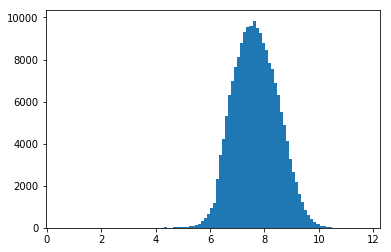

In [6]:
loss_log_transformed = loss.apply(lambda x: np.log(x + 1))

pl.hist(loss_log_transformed,bins = 100)
pl.show()

### Splitting the data

There are two different types of data in this data set, which are numeric and non-numeric.
Below the numeric and non-numeric data will be separated.


In [7]:
split = 116 
cont_data = train_data_raw.iloc[:,split:] 
display(cont_data.head())
print (cont_data.shape)

split = 116 
cont_test_data = test_data_raw.iloc[:,split:] 
display(cont_test_data.head())
print (cont_test_data.shape)

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843
1,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496
2,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425
3,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642
4,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606


(188318, 14)


,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,0.321594,0.299102,0.246911,0.402922,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,0.634734,0.620805,0.654310,0.946616,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,0.290813,0.737068,0.711159,0.412789,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
3,0.268622,0.681761,0.592681,0.354893,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
4,0.553846,0.299102,0.263570,0.696873,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823


(125546, 14)


### Numeric Data

Histograms are plotted to what is going on within the continuous data. None of the categories seem to have a normal distribution

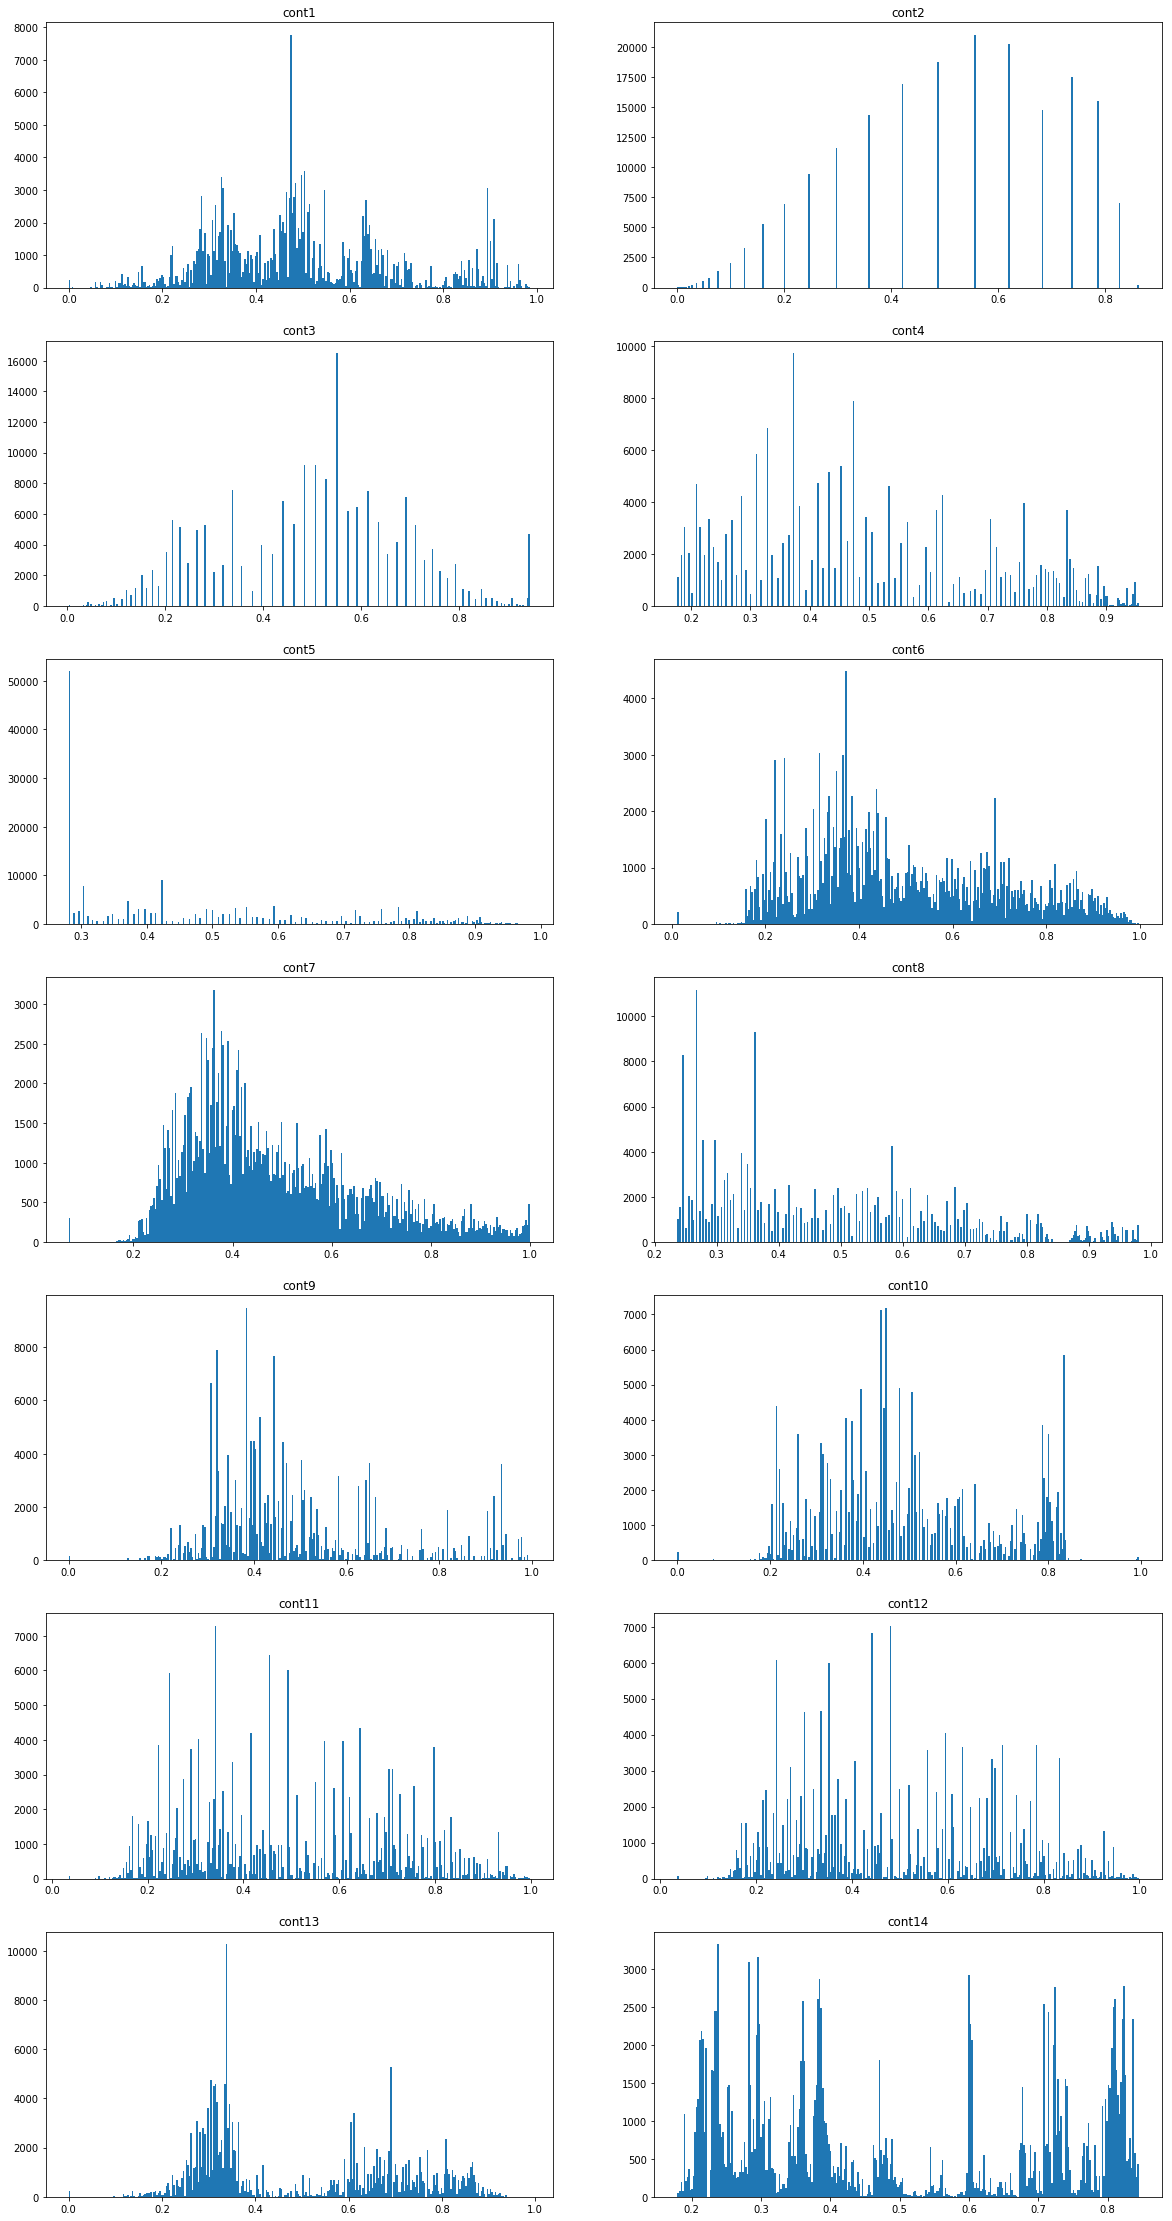

In [17]:
#plot continues data

cont_data_columns = cont_data.columns.values
fig, axarr = pl.subplots(nrows=7, ncols=2,figsize=(20, 40))

#columns
index_arr = -1
for i in range(7):
    for j in range(2):
        index_arr = index_arr + 1
        axarr[i, j].hist(cont_data[cont_data_columns[index_arr]], bins = 300)
        axarr[i, j].set_title(cont_data_columns[index_arr])


pl.show()

### Hot key encoding

Typically learning algorithms expect input to be numeric so all non-numeric data must be converted into numeric data. There are many ways to do so but for this project we will be using one-hot encoding. This method creates dummy variables for each possible category of each non-numeric feature.

In [18]:
cat_data = train_data_raw.iloc[:,:split] 
display(cat_data.head())
print (cat_data.shape)

cat_test_data = test_data_raw.iloc[:,:split] 
display(cat_test_data.head())
print (cat_test_data.shape)

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116
0,A,B,A,B,A,A,A,A,B,A,...,J,G,BU,BC,C,AS,S,A,O,LB
1,A,B,A,A,A,A,A,A,B,B,...,K,K,BI,CQ,A,AV,BM,A,O,DP
2,A,B,A,A,B,A,A,A,B,B,...,F,A,AB,DK,A,C,AF,A,I,GK
3,B,B,A,B,A,A,A,A,B,A,...,K,K,BI,CS,C,N,AE,A,O,DJ
4,A,B,A,B,A,A,A,A,B,B,...,G,B,H,C,C,Y,BM,A,K,CK


(188318, 116)


,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116
0,A,B,A,A,A,A,A,A,B,A,...,L,K,BI,BC,A,J,AX,A,Q,HG
1,A,B,A,B,A,A,A,A,B,A,...,F,B,BI,CO,E,G,X,A,L,HK
2,A,B,A,B,B,A,B,A,B,B,...,G,A,BI,CS,C,U,AE,A,K,CK
3,A,A,A,A,B,A,A,A,A,A,...,K,K,BI,CR,A,AY,AJ,A,P,DJ
4,B,A,A,A,A,B,A,A,A,A,...,E,B,AB,EG,A,E,I,C,J,HA


(125546, 116)


In [19]:
len(np.unique(cat_data['cat1']))
unique_var = []
for column in cat_data.columns.values:
    variables = len(np.unique(cat_data[column]))
    unique_var.append(variables)

#    print "{} unique lables in {}".format(variables,column)

In [20]:
unique_var2 =  list(set(unique_var))
sorted_var = np.sort(unique_var2)
for uniquer in sorted_var:
    n = unique_var.count(uniquer)
    print( "There is {} unique categories in {} of the lables".format(uniquer,n))

There is 2 unique categories in 72 of the lables
There is 3 unique categories in 4 of the lables
There is 4 unique categories in 12 of the lables
There is 5 unique categories in 3 of the lables
There is 7 unique categories in 4 of the lables
There is 8 unique categories in 3 of the lables
There is 9 unique categories in 1 of the lables
There is 11 unique categories in 1 of the lables
There is 13 unique categories in 1 of the lables
There is 15 unique categories in 1 of the lables
There is 16 unique categories in 2 of the lables
There is 17 unique categories in 2 of the lables
There is 19 unique categories in 2 of the lables
There is 20 unique categories in 2 of the lables
There is 23 unique categories in 1 of the lables
There is 51 unique categories in 1 of the lables
There is 61 unique categories in 1 of the lables
There is 84 unique categories in 1 of the lables
There is 131 unique categories in 1 of the lables
There is 326 unique categories in 1 of the lables


In [12]:
cat_data_df = cat_data.apply(lambda x: pd.factorize(x)[0])

cat_test_data_df = cat_test_data.apply(lambda x: pd.factorize(x)[0])

display(cat_data_df.head())

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,1,...,1,1,1,1,1,1,1,0,0,1
2,0,0,0,1,1,0,0,0,0,1,...,2,2,2,2,1,2,2,0,1,2
3,1,0,0,0,0,0,0,0,0,0,...,1,1,1,3,0,3,3,0,0,3
4,0,0,0,0,0,0,0,0,0,1,...,3,3,3,4,0,4,1,0,2,4


### Shuffle and split data

Now that the data has been processed the training data will be split into testing and training in which 80% is used for training and 20% is used for testing.

In [13]:
cat_cont_data = pd.concat([cat_data_df, cont_data], axis=1)
display(cat_cont_data.head())


cat_cont_test_data = pd.concat([cat_test_data_df, cont_test_data], axis=1)
display(cat_cont_test_data.head())

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,0,0,0,0,0,0,0,0,0,0,...,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843
1,0,0,0,1,0,0,0,0,0,1,...,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496
2,0,0,0,1,1,0,0,0,0,1,...,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425
3,1,0,0,0,0,0,0,0,0,0,...,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642
4,0,0,0,0,0,0,0,0,0,1,...,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606


,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,0,0,0,0,0,0,0,0,0,0,...,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,0,0,0,1,0,0,0,0,0,0,...,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,0,0,0,1,1,0,1,0,0,1,...,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
3,0,1,0,0,1,0,0,0,1,0,...,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
4,1,1,0,0,0,1,0,0,1,0,...,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823


In [14]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cat_cont_data, loss_log_transformed, test_size = 0.25)

print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Training set has 141238 samples.
Testing set has 47080 samples.


In [ ]:
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.cross_validation import cross_val_score

scorer = make_scorer(mean_absolute_error, False)

clf = RandomForestRegressor(n_estimators=500, n_jobs=-1)
cv_score = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=15, scoring = scorer)

plt.figure(figsize=(10,5))
plt.bar(range(len(cv_score)), cv_score)
plt.title('Cross Validation Score')
plt.ylabel('RMSE')
plt.xlabel('Iteration')

plt.plot(range(len(cv_score) + 1), [cv_score.mean()] * (len(cv_score) + 1))
plt.tight_layout()

The code block below will allow for automatically testing different repressors using different data sizes.

### Learning Algorithms

Three different repressors will be taken into consideration linear regression, random forest regression, and extreme gradient regression. The mean absolute error of a un-tuned Linear regression model will be used as our bench mark that we need to beat. Mean absolute error is a measure of the average difference between the actual loss and predicted loss.

In [24]:
from sklearn.ensemble import GradientBoostingRegressor

results = {}
start = time()
learner = GradientBoostingRegressor().fit(X_train, y_train)
end = time()
    
results['train_time'] = end - start
    
start = time()
predictions_test = learner.predict(X_test)
predictions_train = learner.predict(X_train)
end = time()
    
results['pred_time'] = end - start
    
results['acc_train'] = mean_absolute_error(np.exp(y_train), np.exp(predictions_train))
    
results['acc_test'] = mean_absolute_error(np.exp(y_test), np.exp(predictions_test))
    
print ("Trained score = {:.2f} and test score = {:.2f}".format(results['acc_train'],results['acc_test']))
print ("Trained time = {:.2f} and pred time = {:.2f}".format(results['train_time'],results['pred_time']))
    
    

Trained score = 1217.56 and test score = 1212.21
Trained time = 75.35 and pred time = 0.80


### Conclusion

After attempting to tune the model using GridSearchCV the un-tuned model mean absolute error 1261 and the tuned model had a mean absolute error of 1312. The goal is to have the lowest mean absolute error so we will have to go with the un-tuned model. There is still many ways of improving the model that can be attempted in the feature. To start off with because there are so many features in the data one can improve the accuracy of the model by finding which features are most important. Along with this correlation between features is a good way to visualize how the different features are interacting with each other.

In [ ]:
y_dummy = range(1,125547)

d = {'loss': y_dummy}
df = pd.DataFrame(data=d)




In [ ]:
dtest_final = xgb.DMatrix(data=cat_cont_test_data,label=y_dummy)


In [ ]:
final_predictions = bst_cv1.predict(dtest_final)
test_data_id
print final_predictions.shape
print test_data_id.shape


In [ ]:
d = {'id': test_data_id, 'loss': final_predictions}
df = pd.DataFrame(data=d)
loss_final = np.exp(df['loss'])
print 
df_final = pd.concat([test_data_id, loss_final], axis=1)



display(df_final.head())

In [ ]:
df_final.to_csv('submission.csv')